# Research Notebook 2
## Suzanne Parr
## Date: February 18, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

1) I added "quantum corrections" to my code to build an improved metric that was derived in a paper by Saeed Rastgoo and colleagues. To get versions of the metric functions f(r), g(r), h(r) that include the quantum parameters, $Q_b$ and $Q_c$; a new expression for $V_{\text{eff}}(r)$ and, the equations of motion, $\frac{dt}{d\lambda}$, $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$, I had to find these expressions buried in the math from the quantum black hole paper. For example to find an expression for $\frac{dr}{d\lambda}$ I had to solve for it from, 

$$-\frac{1}{2} g_{00} g_{11} \left( \frac{dr}{d\lambda} \right)^2 - \frac{1}{2} g_{00} \left( \frac{L^2}{g_{22}} + \epsilon \right) = \frac{1}{2} E^2 $$

I spent 2-3 days reading and trying to understand how and where to incorporate the quantum parameters, and other changes, into my code.

2) I set the values of M and L and varied $Q_b$ and $Q_c$ from 0 to 1 to see what effect the quantum parameters had on $V_{\text{eff}}(r)$ and I made plots both for the massless particles ($\epsilon = 0$) and massive particles ($\epsilon = 1$). 

3) I learned how to define all the variables I work with in the quantum-corrected metric as symbols using the python library, OGRePy then printed out expression using these symbols. I wanted to locate the extrema for $V_{\text{eff}}(r)$ analytically by setting $\frac{dV_{\text{eff}}}{dr} = 0$ and solving for the (real) roots using OGRePy function "solve". However, $\frac{dV_{\text{eff}}}{dr}$ was too complex so I had to use OGRePy "nsolve" to find the extrema numerically.

## Motivation:

1) My team's research is Quantum Black Holes. We aim to learn how quantum physics (physics on a very small scale) has an effect on light and other particles near massive objects governed by general relativity (physics on a very large scale). We were originally given the Schwarzschild metric but recently asked to add quantum corrections. We were given the paper that explains them but we were left alone to sort out how to apply these corrections. I find I can't write code without understanding what's behind it.

2) To be able to understand particle orbits near a black hole, I need to understand how $V_{\text{eff}}$ varies with distance from a SC black hole for given values of M (mass of the black hole), and E, and L (conserved angular momentum & total energy of the particle); and also how it changes with quantum effects.

3) I want to have a better understanding of the Python library, OGRePy and how to solve algebraic expressions analytically with symbols just as I would on a piece of paper. 

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

1) Once I revised the metric functions to include the quantum parameters and defined a new $V_{\text{eff}}(r)$ I spent a few days working on solving for $V_{\text{eff}}(r)$ extrema. Since I had declared all my variables as symbols and used these symbols to make f(r), g(r), h(r), and $V_{\text{eff}}(r)$ I was determined to use OGRePy's "solve" function to solve for (real) roots analytically after setting $\frac{dV_{\text{eff}}}{dr} = 0$. Here's $V_{\text{eff}}(r)$ when we sub in values for f(r), h(r) and $\epsilon = 0$, 

$$V_{eff}(r) = - \frac{0.5 L^{2} \left(- \frac{2 M}{\sqrt{Q_{b} + r^{2}}} + 1\right) \left(- \frac{Q_{b}}{r^{2}} - 1\right)}{r^{2} \left(\frac{M^{2} Q_{c}}{r^{8}} + 1\right)^{0.5}}$$

As can be imagined $\frac{dV_{\text{eff}}}{dr}$ is complex and difficult to solve analytically so I found I could use the OGRePy function 'nsolve' to solve for the roots numerically.

If I solve for extrema for null geodesics ($\epsilon = 0$) I find a maximum (max) just outside the Schwarzschild radius. If the quantum parameters are both set to 0 then this max is at r = 3 * M and there's no min. If I solve for extrema for the timelike case ($\epsilon = 1$) there's a max (at a larger value of r) and also a min (stable orbit) further out. The maximum value of $V_{\text{eff}}(r)$ is higher for the timelike case than for the null one. I found I could get the same values for r and $V_{\text{eff}}(r)$ at extrema as when I used 'scipy.signal', a function borrowed from signal processing. Two very different methods arriving at the same results gives reassurance that the code is likely correct.

2) In the new quantum-corrected system I was using solve_ivp to integrate $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$. This failed because I needed to take the square root of $\frac{dr}{d\lambda}$ which is a negative value. I soon realized that the metric function f(r) should have a negative sign in front. Once I added the (-) in front of f(r) my solver function stopped crashing as it was no longer trying to take the square root of a negative number. 

# 3: So what? (What does it mean?)

# Quantum Black Holes - Intro

In astronomy the only thing we can detect is light. Understanding how it behaves near massive objects is essential to our understanding of black holes as a known form of "dark matter". 

The research goal is to understand how quantum effects can cause slight alterations to the path of massless particles like light - and also massive particles - in the vicinity of black holes. We start with the Schwarzschild metric which describes particle motion in a spacetime governed by general relativity. This metric predicts orbital precession (observed in the orbit of planet Mercury), light deflection (lensing), and time dilation for a particle moving near a massive object. 

Here we add quantum corrections to our Schwarzschild black hole model. The corrections are derived in a paper by Saeed Rastgoo and colleagues. Past researchers found they could weave uncertainty-inspired quantum physics in a Schwarzschild black hole and the interior would behave according to observation but the math breaks down where spacetime flattens i.e. in the asymptotic region. To rectify this the team borrows an idea from 'Loop Quantum Gravity', namely that quantum parameters (QM) are momentum-dependent. This leads to an improvement to the interior model, which also works when extrapolated out to a full spacetime.

In [1]:
# import code libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import OGRePy as gr
from OGRePy.abc import t, r, theta, phi, E, M, L, lamda, sigma, epsilon
from IPython.display import display, Math

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.3.0 (2025-02-04)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: You have the latest version of the package.

# Define parameters symbolically

Define all parameters as symbolic variables to enable their use in both symbolic expressions and numerical calculations.

In [2]:
# Define symbolic variables
t = gr.sym('t')
r = gr.sym('r', nonnegative=True)
theta = gr.sym('theta')
phi = gr.sym('phi')
lamda = gr.sym('lamda')
sigma = gr.sym('sigma')
epsilon = gr.sym('epsilon')
E = gr.sym('E')
M = gr.sym('M')
L = gr.sym('L')
Q_b = gr.sym('Q_b')
Q_c = gr.sym('Q_c')
v_eff = gr.sym('v_eff')
r_sc = gr.sym('r_sc')

# Improved Metric with Quantum Corrections

The following code defines functions that derive from the improved metric: a quantum-corrected variation of the Schwarzschild (SC) metric. Like the classical SC metric,

$$ ds^2 = - f(r) \, dt^2 + g(r) \, dr^2 + h(r) \left( d\theta^2 + \sin^2\theta \, d\phi^2 \right) $$

the improved metric represents a static, spherically symmetric spacetime. Due to spherical symmetry we can confine the direction of angular momentum to $\theta = \frac{\pi}{2}$ and the conserved magnitude to $L = h(r) \frac{d\phi}{d\lambda}$. Since the metric is independent of 't' we can write the conserved energy as, $E = -f(r) \frac{dt}{d\lambda}$. As with the SC metric we can integrate once to get expressions for $\dot{t}$, $\dot{r}^2$ and $\dot{\phi}$ in terms of the metric functions, the conserved quantities, E and L and $\epsilon$ (0 for null and 1 for time-like geodesics). If we re-arrange the radial component to isolate $E^2$ we can "read off" the Effective Potential,

$$V_{\text{eff}}(r) = - \frac{1}{2} f(r) \left( \frac{L^2}{h(r)} + \epsilon \right)$$

an expression that is comparable to Newtonian gravitational potential energy. Below we define the metric functions, Effective Potential, and Equations of Motion for the quantum-corrected metric. We also get a new version of $\frac{dr}{d\lambda}$, 

$$\frac{dr}{d\lambda} = \left( \frac{-1}{g(r)} \left( \frac{E^2}{f(r)} + \left( \frac{L^2}{h(r)} + \epsilon \right) \right) \right)^{\frac{1}{2}}$$

In [3]:
# block 2 - functions: Schwarzschild radius, quantum-corrected metric functions, effective potential and equations of motion.

# constants: normalized speed of light & gravitational constant
c = 1.0 
G = 1.0 

# get schwarzschild radius from mass
def r_sc(M):
    return (2*G*M/c**2)

# schwarzschild metric functions (dependent on radial coordinate, r, SC radius and quantum corrections, Q_b, Q_c)
def f(r, M, Q_b, Q_c):
    return -(1 + Q_b/r**2) * (1 + (Q_c*(2*M)**2)/(4*r**8))**(-1/4) * (1-(2*M)/(gr.s.sqrt(r**2+Q_b)))

def g(r, M, Q_b, Q_c):
    return (1 + (Q_c*(2*M)**2)/(4*r**8))**(1/4) * (1-(2*M)/(gr.s.sqrt(r**2+Q_b)))**(-1)

def h(r, M, Q_c):
    return r**2 * (1 + (Q_c*(2*M)**2)/(4*r**8))**(1/4)

# effective potential
def v_eff(r, M, L, Q_b, Q_c, epsilon=0):
    return -0.5*f(r, M, Q_b, Q_c) * (L**2*h(r, M, Q_c)**(-1) + epsilon)

# lamda - not accessed in this function - can be replaced by tau for massive particles
def eq_of_motion(lamda, y, params, epsilon=0):

    t, r, phi = y
    E, L, M, Q_b, Q_c = params

    dt_dlamda = - E / f(r, M, Q_b, Q_c)
    dphi_dlamda = L / h(r, M, Q_c)
    # **** (+) if going away from BH; (-) if going towards the BH ****
    dr_dlamda = gr.s.sqrt(-g(r, M, Q_b, Q_c)**(-1) * (E**2 / f(r, M, Q_b, Q_c) + (L**2 / h(r, M, Q_c) + epsilon)))
    #dr_dlamda = -gr.s.sqrt(-g(r, M, Q_b, Q_c)**(-1) * (E**2 / f(r, M, Q_b, Q_c) + (L**2 / h(r, M, Q_c) + epsilon)))

    return [dt_dlamda, dr_dlamda, dphi_dlamda]

# symbols test
display(Math(r"v_{eff} (\epsilon = 0) = " + sp.latex(v_eff(r, M, L, Q_b, Q_c))))

<IPython.core.display.Math object>

# Assign Values to Constants

Assign values for Mass (central massive object), Energy and Angular momentum of the orbiting particle, and a set of values for the quantum parameters (QM) to see how quantum effects change effective potential.

In [4]:
# block 3 - assign values for mass, energy, and angular momentum
M1 = 1.0  
rs1 = r_sc(M1)
r1 = 10 * rs1
Q_b0 = 0.0
Q_b1 = 0.25
Q_b2 = 0.5
Q_b3 = 0.75
Q_c0 = 0.0
Q_c1 = 0.25
Q_c2 = 0.5
Q_c3 = 0.75

# conserved quantities (constants)
E1 = 1.1 # energy of orbiting particle
L1 = 4.3 # angular momentum of orbiting particle

# Effective Potential as a function of radius from the black hole

Next we explore the effective potential. To have orbits (around a massive object) we need either a maxima or a minima. Minima produce very stable orbits. Maxima can sustain an orbit but the object is easily knocked out of this orbit. If we plot $V_{\text{eff}}(r)$, constrain M and L and vary the quantum parameters (QM) we find that the extremum (maximum) is always at 3*M when QM = 0 and move to the left as QM increase from 0 to 1.

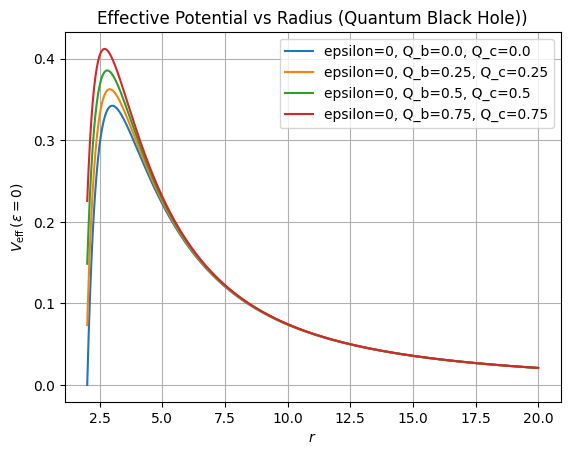

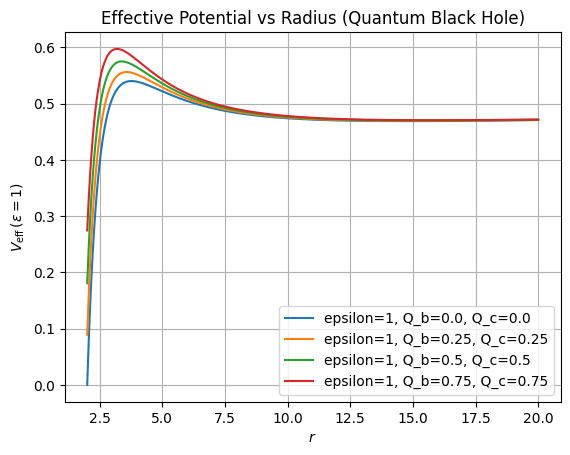

In [5]:
# block 4 - calculate v_eff as a function of r given M (black hole mass), L (particles's angular momentum)
# span of r values
r_vals = np.linspace(rs1, r1, 1000)

# get list of effective potential values for sigma=0
v_eff_vals_Q0 = np.array([v_eff(i, M1, L1, Q_b0, Q_c0, epsilon=0) for i in r_vals])
v_eff_vals_Q1 = np.array([v_eff(i, M1, L1, Q_b1, Q_c1, epsilon=0) for i in r_vals])
v_eff_vals_Q2 = np.array([v_eff(i, M1, L1, Q_b2, Q_c2, epsilon=0) for i in r_vals])
v_eff_vals_Q3 = np.array([v_eff(i, M1, L1, Q_b3, Q_c3, epsilon=0) for i in r_vals])

# get list of effective potential values for sigma=1
v_eff_vals_Q0_1 = np.array([v_eff(i, M1, L1, Q_b0, Q_c0, epsilon=1) for i in r_vals])
v_eff_vals_Q1_1 = np.array([v_eff(i, M1, L1, Q_b1, Q_c1, epsilon=1) for i in r_vals])
v_eff_vals_Q2_1 = np.array([v_eff(i, M1, L1, Q_b2, Q_c2, epsilon=1) for i in r_vals])
v_eff_vals_Q3_1 = np.array([v_eff(i, M1, L1, Q_b3, Q_c3, epsilon=1) for i in r_vals])

# Plot the results epsilon = 0
plt.plot(r_vals, v_eff_vals_Q0, label=f'epsilon=0, Q_b={Q_b0}, Q_c={Q_c0}')
plt.plot(r_vals, v_eff_vals_Q1, label=f'epsilon=0, Q_b={Q_b1}, Q_c={Q_c1}')
plt.plot(r_vals, v_eff_vals_Q2, label=f'epsilon=0, Q_b={Q_b2}, Q_c={Q_c2}')
plt.plot(r_vals, v_eff_vals_Q3, label=f'epsilon=0, Q_b={Q_b3}, Q_c={Q_c3}')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\rm eff} \, (\epsilon = 0)$')
plt.title('Effective Potential vs Radius (Quantum Black Hole))')
plt.legend()
plt.grid(True)
plt.show()
# Plot the results epsilon = 1
plt.plot(r_vals, v_eff_vals_Q0_1, label=f'epsilon=1, Q_b={Q_b0}, Q_c={Q_c0}')
plt.plot(r_vals, v_eff_vals_Q1_1, label=f'epsilon=1, Q_b={Q_b1}, Q_c={Q_c1}')
plt.plot(r_vals, v_eff_vals_Q2_1, label=f'epsilon=1, Q_b={Q_b2}, Q_c={Q_c2}')
plt.plot(r_vals, v_eff_vals_Q3_1, label=f'epsilon=1, Q_b={Q_b3}, Q_c={Q_c3}')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\rm eff} \, (\epsilon = 1)$')
plt.title('Effective Potential vs Radius (Quantum Black Hole)')
plt.legend()
plt.grid(True)
plt.show()

# Extrema

In the following code block we find extrema by setting $\frac{dV_{\text{eff}}}{dr} = 0$ and solving for the (real) roots - values of 'r' where the slope of the effective potential is '0'. We use the OGRePy function "nsolve" to accomplish this numerically. To determine if these r values represent maxima or minima, we take the second derivative $\frac{d^2V_{\text{eff}}}{dr^2}$. A negative value indicates a maximum; a positive value suggests a minimum.

In the case of a massless particle ($\epsilon = 0$) there is a maximum at r = 3 * M when QM = 0.

Next we locate extrema numerically using 'scipy.signal', a function used in signal processing and find the extrema to be located at the same spot. For both the case of $\epsilon = 0$ and $\epsilon = 1$ we set the quantum parameters to 0.25 for a test.


Extrema for ε = 0:
r = 2.9013, v_eff = 0.3626, Type: max

Extrema for ε = 1:
r = 3.5697, v_eff = 0.5562, Type: max
r = 15.0722, v_eff = 0.4695, Type: min


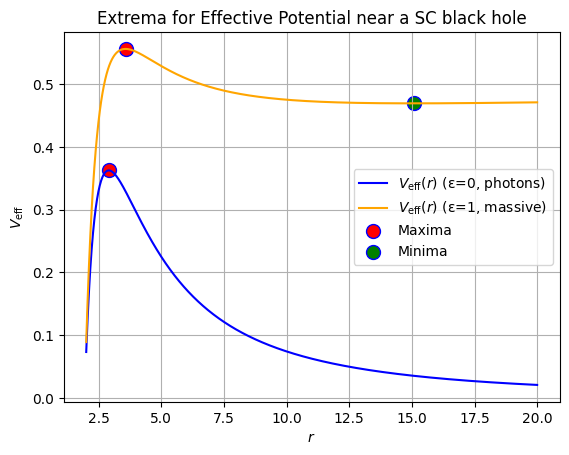

In [6]:
# Block 5 - locate extrema for v_eff vs r (radial distance from a black hole). 
# extrema are found using OGRePy 'nsolve' numerically.
def find_extrema_num(M_val, L_val, Q_b_val, Q_c_val, eps_val, r_range):
    v_eff = -0.5 * f(r, M_val, Q_b_val, Q_c_val) * (L_val**2 / h(r, M_val, Q_c_val) + eps_val)

    # first derivative with respect to r
    dv_eff_dr = gr.s.diff(v_eff, r)
    # second derivative with respect to r
    d2v_eff_dr2 = gr.s.diff(dv_eff_dr, r)

    extrema = []
    # solve dv_eff_dr = 0 for a range of initial guesses
    for r_init in np.linspace(r_range[0], r_range[1], 50):
        try:
            root = gr.s.nsolve(dv_eff_dr, r, r_init)
            root = float(root)
            if not any(np.isclose(root, ext, atol=1e-6) for ext in extrema) and r_range[0] <= root <= r_range[1]:
                extrema.append(root) # ensure no "very close" extrema (tolerance of 10^-6); only pick values within the chosen r range. 
        except Exception:
            pass  # skip guess if nsolve fails

    extrema_results = []
    print(f"\nExtrema for ε = {eps_val}:")
    for r_ex in extrema:
        v_eff_at_r = v_eff.subs(r, r_ex).evalf()  # v_eff value at extrema
        d2v_eff_dr2_r_ex = d2v_eff_dr2.subs(r, r_ex).evalf()  # 2nd derivative at extrema
        extrema_type = "min" if d2v_eff_dr2_r_ex > 0 else "max"
        extrema_results.append((r_ex, v_eff_at_r, extrema_type))
        print(f"r = {r_ex:.4f}, v_eff = {v_eff_at_r:.4f}, Type: {extrema_type}")

    return extrema_results, v_eff

r_range = (rs1, 10 * rs1)
eps0 = 0
eps1 = 1

# locate extrema for massless particles (epsilon = 0)
ext_photons, v_eff_photons = find_extrema_num(M1, L1, Q_b1, Q_c1, eps0, r_range)

# locate extrema for massive particles (epsilon = 1)
ext_timelike, v_eff_timelike = find_extrema_num(M1, L1, Q_b1, Q_c1, eps1, r_range)

r_vals1 = np.linspace(r_range[0], r_range[1], 1000)
v_eff_vals_photons = [v_eff_photons.subs(r, rv) for rv in r_vals1]
v_eff_vals_timelike = [v_eff_timelike.subs(r, rv) for rv in r_vals1]

# separate maxima, minima
max_x, max_y = [], []
min_x, min_y = [], []

for r_ex, v_eff_at_r, ext_type in ext_photons + ext_timelike:
    if ext_type == "max":
        max_x.append(r_ex)
        max_y.append(v_eff_at_r)
    else:
        min_x.append(r_ex)
        min_y.append(v_eff_at_r)

plt.plot(r_vals1, v_eff_vals_photons, color='b', label=r'$V_{\mathrm{eff}}(r)$ (ε=0, photons)')
plt.plot(r_vals1, v_eff_vals_timelike, color='orange', label=r'$V_{\mathrm{eff}}(r)$ (ε=1, massive)')
plt.scatter(max_x, max_y, color='r', s=100, edgecolors='b', label="Maxima")
plt.scatter(min_x, min_y, color='g', s=100, edgecolors='b', label="Minima")
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\mathrm{eff}}$')
plt.title("Extrema for Effective Potential near a SC black hole")
plt.legend()
plt.grid(True)
plt.show()

Extrema for epsilon=0:
r = 2.9009, v_eff = 0.3626

Extrema for epsilon=1:
r = 3.5676, v_eff = 0.5562
r = 15.0811, v_eff = 0.4695


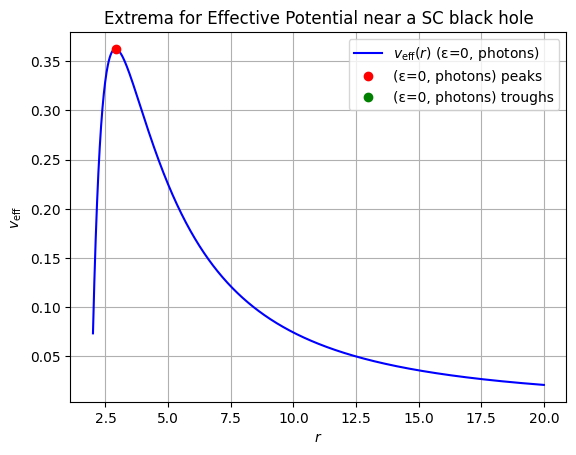

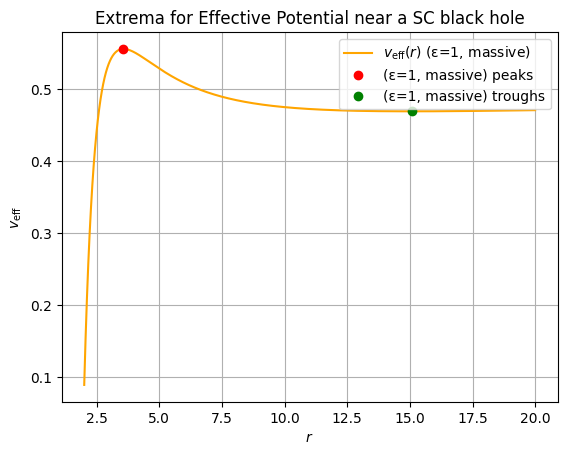

In [8]:
# block 6 - find extrema for v_eff vs r for the space around a black hole in a quantum-corrected Schwarzschild metric.
# solved numerically using scipy "find_peaks"...borrowed from signal processing.

from scipy.signal import find_peaks

# find peaks for sigma=0, sigma=1
peaks1, _ = find_peaks(v_eff_vals_Q1)
peaks2, _ = find_peaks(v_eff_vals_Q1_1)

# detect troughs (invert the function to find minima as peaks) for epsilon=0, epsilon=1
troughs1, _ = find_peaks(-v_eff_vals_Q1)
troughs2, _ = find_peaks(-v_eff_vals_Q1_1)

# combine and sort extrema
extrema1 = np.sort(np.concatenate((peaks1, troughs1)))
extrema2 = np.sort(np.concatenate((peaks2, troughs2)))

# print extrema values for epsilon=0 and epsilon=1
print("Extrema for epsilon=0:")
for j in extrema1:
    print(f"r = {r_vals[j]:.4f}, v_eff = {v_eff_vals_Q1[j]:.4f}")

print("\nExtrema for epsilon=1:")
for k in extrema2:
    print(f"r = {r_vals[k]:.4f}, v_eff = {v_eff_vals_Q1_1[k]:.4f}")

plt.plot(r_vals, v_eff_vals_Q1, color='b', label=r'$v_{\mathrm{eff}}(r)$ (ε=0, photons)')
plt.plot(r_vals[peaks1], v_eff_vals_Q1[peaks1], 'o', color='r', label='(ε=0, photons) peaks')
plt.plot(r_vals[troughs1], v_eff_vals_Q1[troughs1], 'o', color='g', label='(ε=0, photons) troughs')
plt.xlabel(r'$r$')
plt.ylabel(r'$v_{\rm eff}$')
plt.title('Extrema for Effective Potential near a SC black hole')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(r_vals, v_eff_vals_Q1_1, color='orange', label=r'$v_{\mathrm{eff}}(r)$ (ε=1, massive)')
plt.plot(r_vals[peaks2], v_eff_vals_Q1_1[peaks2], 'o', color='r', label='(ε=1, massive) peaks')
plt.plot(r_vals[troughs2], v_eff_vals_Q1_1[troughs2], 'o', color='g', label='(ε=1, massive) troughs')
plt.xlabel(r'$r$')
plt.ylabel(r'$v_{\rm eff}$')
plt.title('Extrema for Effective Potential near a SC black hole')
plt.legend()
plt.grid(True)
plt.show()

# Orbits

In this approach we solve for $r(\lambda)$ and $\phi(\lambda)$ by integrating the equations of motion $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$ with 'solve_ivp', then make a polar plot $r(\lambda)$ vs $\phi(\lambda)$ and convert to cartesian coordinates to plot y(x).

In the following code block we define the solver function, 'solve_r_phi_lamda', then in the next block we set initial conditions, run the solver, and plot. We can test starting the particle far away from the black hole and moving it inwards; or start relatively close in and move outwards. Next steps will be to change initial conditions to reproduce a circular, scattering and plunge orbit.

In [9]:
# block 7 - solver to compute r(lambda), phi(lambda)

# solve for r and phi as a function of tau using eq_of_motion
def solve_r_phi_lamda(params, lamda_range, r_init, phi_init, epsilon=0):

    E, L, M, Q_b, Q_c = params

    # initial conditions [t, r, phi]
    y0 = [0, r_init, phi_init] 

    def dy_dt(lamda, y):
        # get ODE's from eq_of_motion function
        dt_dlamda, dr_dlamda, dphi_dlamda = eq_of_motion(lamda, y, params, epsilon)

        return [dt_dlamda, dr_dlamda, dphi_dlamda]

    # solve for r(lambda) and phi(lambda)
    sol = solve_ivp(dy_dt, lamda_range, y0, t_eval=np.linspace(*lamda_range, 1000), atol=1e-5, rtol=1e-5)
    return sol

Initial dr/dlambda: 1.02908522743141


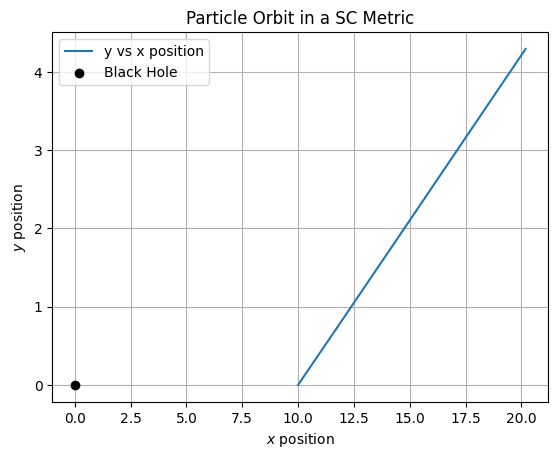

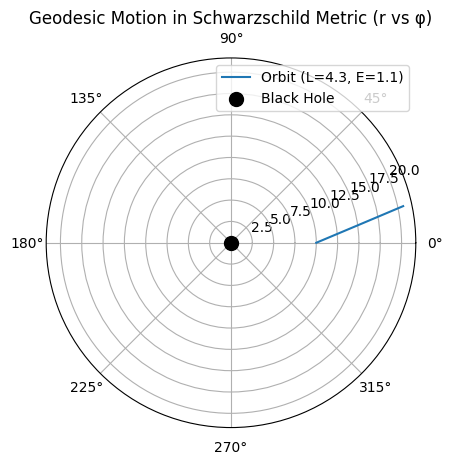

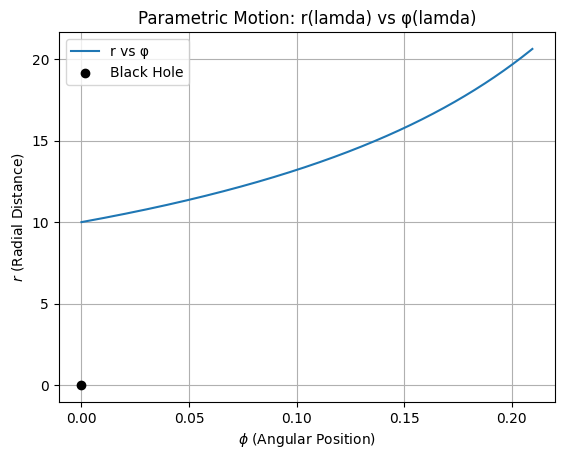

In [10]:
# block 8 
# initial conditions / constants
#r_init = 1.5 * rs1 
# test 
r_init = 5 * rs1
params = [E1, L1, M1, Q_b1, Q_c1]

# **** final lamda value is (+) if going away from BH; (-) if going towards the BH ****
lamda_range = [0, 10]
#lamda_range = [0, -10]
phi_init = 0

# **** test to check sign of initial dr/d_lamda value ****
dt0, dr0, dphi0 = eq_of_motion(0, [0, r_init, phi_init], params, epsilon=0)
print(f"Initial dr/dlambda: {dr0}") 

sol_y = solve_r_phi_lamda(params, lamda_range, r_init, phi_init, epsilon=0)

if not sol_y.success:
    print("Integration failed:", sol_y.message)

# get results for r(lamda) and phi(lamda)
r2 = sol_y.y[1]  # radial distances
phi2 = sol_y.y[2]  # angular positions

x2 = r2 * np.cos(phi2)
y2 = r2 * np.sin(phi2)
 
# cartesian coordinates
plt.plot(x2, y2, label=f'y vs x position')
plt.scatter([0], [0], color='black', label='Black Hole', zorder=5)
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.title('Particle Orbit in a SC Metric')
plt.legend()
plt.grid(True)
plt.show()

# polar plot
plt.polar(phi2, r2, label=f'Orbit (L={L1}, E={E1})')
plt.scatter([0], [0], color='black', marker='o', s=100, label='Black Hole', zorder=5)
plt.title('Geodesic Motion in Schwarzschild Metric (r vs φ)')
plt.legend()
plt.grid(True)
plt.show()

# parametric plot: r(lamda) vs phi(lamda)
plt.plot(phi2, r2, label=f'r vs φ')
plt.scatter([0], [0], color='black', label='Black Hole', zorder=5)
plt.xlabel(r'$\phi$ (Angular Position)')
plt.ylabel(r'$r$ (Radial Distance)')
plt.title('Parametric Motion: r(lamda) vs φ(lamda)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Now what? (What's next?)
## Plan for the next week

The next step will be to explore orbits for light (massless) and for particles with mass. To achieve this we need to work in cartesian coordinates with the particle starting far out from the black hole and traveling inwards. I will have to change initial conditions to reproduce a circular, scattering and plunge orbit as shown in section 9.4 of, Gravity - An Introduction to Einstein's General Relativity, by J.M. Hartle. I will have to reproduce these orbits with and without quantum corrections i.e. to see if the quantum parameters perceptibly change the orbits.

I will continue learning about object-oriented programming in the background so that eventually I can have a quantum black hole class.

# 5. References

A generalized uncertainty-inspired quantum black hole, Federica Fragomeno, Douglas M. Gingrich, Samantha Hergott, Saeed Rastgoo, and Evan Vienneau; University of Alberta, 2024.

EXPLORE - Draft, Saeed Rastgoo, 2024.

ChatGPT - LaTeX mark-up for symbols and equations; OGRePy functions and use.

# Grading

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2 / 2       |
| Experience    |       2 / 2       |
| What?         |       2 / 2       |
| So what?      |       4 / 4       |
| Now what?     |       4 / 4       |
| Bibliography  |       2.5 / 3     |
| Style         |       3 / 3       |
| Total         |       19.5 / 20   |

## Additional Comments

I really liked that you used a different function to validate your results!

One thing for the future is that you could mention where your equations are from. You have a bibliography, one thing you could do is assign numbers to them (see the examples for reference, if you double-click on markdown cells, you'll see the code underneath) and reference those numbers.